In [1]:
from IPython.display import Image

# Implementing a perceptron learning algorithm in Python

The code below shows an object-oriented implementation of a perceptron classifier in Python. Take a minute to read over the code and understand what it is saying.

In [2]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
#         self.bias = bias


    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
#         print(self.w_[:])
        print("Bias =",self.w_[0])
        print("Width =",self.w_[1])
        print("Length =",self.w_[2])

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    

## Training a perceptron model on the Iris dataset

In [3]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,sepal_len,sepal_width,petal_len,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

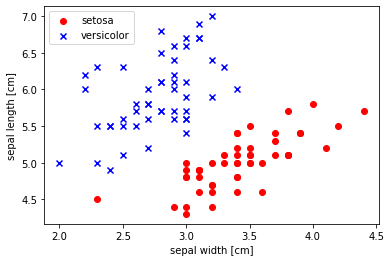

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length (modified to sepal width and length)
X = df.iloc[0:100][["sepal_width", "sepal_len"]].values
X2 = df.iloc[0:100][["sepal_len", "petal_len"]].values
# print(X)
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal width [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


In [5]:
# b = Perceptron(eta=0.01, n_iter=1000, random_state=1)
# b.fit(X,y)

### Training the perceptron model

Bias = -24.983756546363313
Width = -20.086117564136735
Length = 15.814718282477175


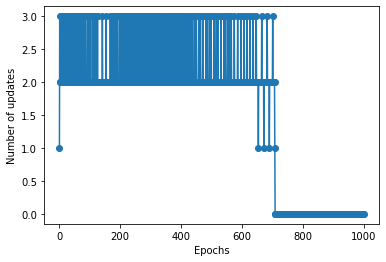

In [6]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [7]:
# #epoch = int
# def printIterations(epoch):
#     ppn = Perceptron(eta=0.1, n_iter=epoch)
#     ppn.fit(X, y)
#     plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
#     plt.xlabel('Epochs')
#     plt.ylabel('Number of updates')
#     # plt.savefig('images/02_07.png', dpi=300)
#     plt.show()



In [8]:
#epoch = int
def printIterationstest(epoch):
    ppn = Perceptron(eta=0.1, n_iter=epoch)
    ppn.fit(X, y)
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]')
    plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
    plt.show()

<br>
<br>

### A function for plotting decision regions

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Deliverables
1. The plot showing the number of updates versus epochs when using 1000 iterations.

In [10]:
#epoch = int
def printIterations(epoch):
    ppn = Perceptron(eta=0.1, n_iter=epoch)
    ppn.fit(X, y)
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of updates')
    # plt.savefig('images/02_07.png', dpi=300)
    plt.show()

Bias = -24.983756546363313
Width = -20.086117564136735
Length = 15.814718282477175


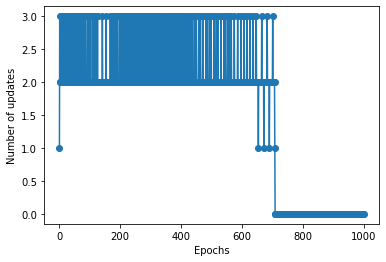

In [11]:
printIterations(1000)

2. The seven region boundary fgures for different numbers of iterations.

Bias = -0.3837565463633676
Width = -1.5661175641365008
Length = 1.8347182824773667


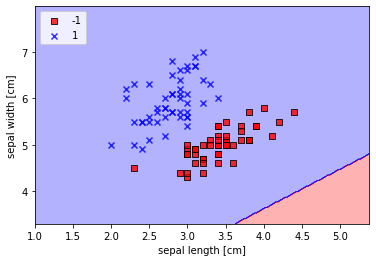

10 interations: None
Bias = -0.9837565463633675
Width = -3.526117564136501
Length = 2.674718282477368


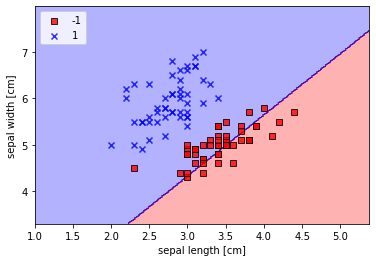

20 interations: None
Bias = -2.3837565463633674
Width = -7.706117564136497
Length = 5.79471828247737


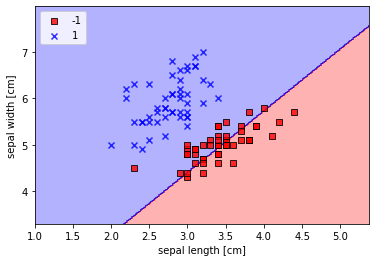

50 interations: None
Bias = -4.783756546363369
Width = -11.286117564136468
Length = 8.254718282477354


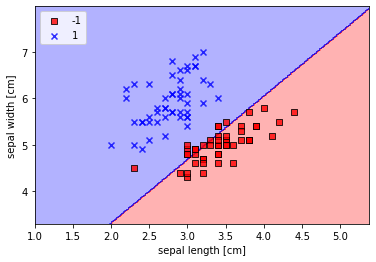

100 interations: None
Bias = -7.983756546363371
Width = -15.946117564136447
Length = 11.054718282477296


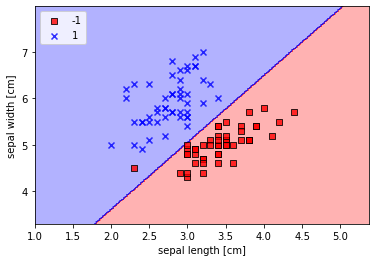

200 interations: None
Bias = -20.18375654636333
Width = -18.126117564136653
Length = 14.394718282477204


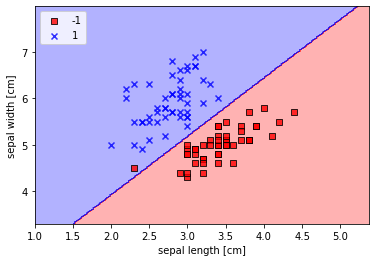

500 interations: None
Bias = -24.983756546363313
Width = -20.086117564136735
Length = 15.814718282477175


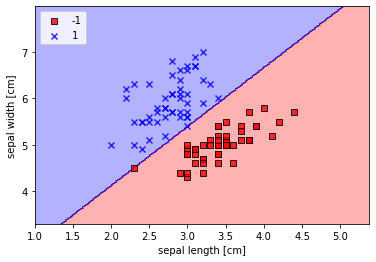

1000 interations: None


In [12]:
print("10 interations:",printIterationstest(10))
print("20 interations:",printIterationstest(20))
print("50 interations:",printIterationstest(50))
print("100 interations:",printIterationstest(100))
print("200 interations:",printIterationstest(200))
print("500 interations:",printIterationstest(500))
print("1000 interations:",printIterationstest(1000))

3. Write the linear function that is learned, in the form m1x1 + m2x2 + b, based on the parameters in the w vector as described above.

$Y$ = $-3.52x_{1}$ + $2.67x_{2}$ - $.983$

# Modifying Perceptron

In [13]:
class Winnow(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=1.0, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
#         self.bias = bias


    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=1.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
#         print(self.w_[0])

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) ##################
#                 print(update)
                if update > 0:
                    self.w_[1:] *= (self.eta*xi)
                    self.w_[0] *= self.eta * 1.0
                if update < 0:
                    self.w_[1:] /= (self.eta*xi)
                    self.w_[0] /= self.eta / 1.0     
                else:
                    pass              

                errors += int(update != 0.0)
            self.errors_.append(errors)
#         print(self.w_[:])
        print("Bias =",self.w_[0])
        print("Width =",self.w_[1])
        print("Length =",self.w_[2])

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 100.0, 1, -1)
    
    

# Winnow Deliverables

1. The plot showing the number of updates versus epochs when using 10 iterations.

Bias = 1.0162434536366325
Width = 0.31022282708824
Length = 35.018896226813965


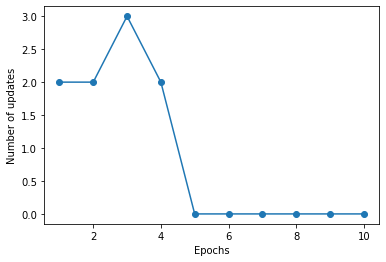

In [14]:
win = Winnow(eta=1.0, n_iter=10)
win.fit(X2, y)

plt.plot(range(1, len(win.errors_) + 1), win.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

2. The region boundary figure.

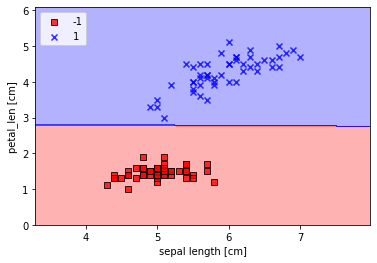

In [15]:


plot_decision_regions(X2, y, classifier=win)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal_len [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

3. Write the linear function that is learned, in the form m1x1 + m2x2 + b.

$Y$ = $35.01x_{1}$ + $0.310x_{2}$ + $1.016$

# Comments

- I am not sure if I implemented the Winnow update algorithm because it does not classify a single point correctly. You mentioned that this algorithm isn't great for this data set but I still expected more accurate results.

- Also, In my plot showing updates and epochs I see it converge after 5 epochs but then I see it change again once it gets to 10. This is something I was not able to fix so the graphs and formula you see above are just my best attempts.

- I would love to know how to properly impletment this in the future if you have the time